# Apresentação:

Dataset utilizad: [Hands-On Machine Learning (O'Relly)](https://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf).

Os dados aqui utilizados serão do *digits dataset* que é uma amostra de digitos tipo o MNIST, contendo $1797$ imagens $8 \times 8$ representando digitos de $0$ a $9$.

Descrição dos dados:
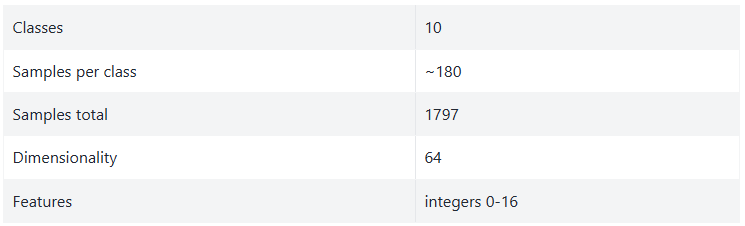

Documentações:
* sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#load-digits

In [1]:
# Bibliotecas:
from sklearn.datasets import load_digits

from matplotlib import pyplot as plt
from matplotlib.image import imread
from tqdm import tqdm
import pandas as pd
import numpy as np

## Importando e Tratando os dados:

In [ ]:
# Instanciando Dados:
digits = load_digits();digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
# Visualizando Dados:
df_original = pd.concat([pd.DataFrame(digits.data, columns=digits.feature_names),
                pd.DataFrame(digits.target, columns = ['target'])],axis=1);df_original

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


# K-means from Scratch:

## Algoritmo:
1. Retirar escala dos dados;
  * O método escolhido para retirar estala dos dados foi a padronização:
  $z_n = \frac{x-\mu}{\sigma}$
  
2. Inicializar centroids;
3. Etiquetar cada ponto;
4. Atualizar centroids;
5. Repeti-se os passos 3 e 4 os centroids pararem de mudar.

In [ ]:
# Função para normalizar os dados
def normalize_data(X):
    '''
    Normaliza os dados para ter média 0 e desvio padrão 1.

    # Entrada:
    numpy.ndarray: Matriz dos dados.

    # Saída:
    numpy.ndarray: Matriz dos dados normalizados.
    '''
    dados_normalizados = []
    for data_point in X.T: # Eu acho mais fácil trabalhar com variáveis como linhas.
        mean = np.mean(data_point)
        std = np.std(data_point)
        data_point_normalizado = [(valor - mean) / std for valor in data_point]
        dados_normalizados.append(data_point_normalizado)

    return np.array(dados_normalizados).T  # Transpondo de volta

In [ ]:
def initialize_centroids(X, K):
  '''
    Função criada para normalizar inicializar
  os centroides.

  # Entrada:
  numpy.ndarray: Matriz dos dados.
  int: Número de clusters.

  # Saída:
  numpy.ndarray: Matriz dos centróides.

  '''
  # Seleciona K pontos aleatórios do conjunto de dados como centróides iniciais
  indices = np.random.choice(X.shape[0], K, replace=False)
  centroids = X[indices]
  return centroids

In [ ]:
def assign_clusters(X, centroids):
  '''
  Atribui cada ponto de dados ao centroide mais próximo.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.

  # Saída:
  numpy.ndarray: Array de tamanho N contendo o índice do cluster mais próximo para cada ponto.
  '''
  # Atribui cada ponto de dados ao centroide mais próximo
  distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
  cluster_assignments = np.argmin(distances, axis=1)
  return cluster_assignments

In [ ]:
def update_centroids(X, cluster_assignments, K):
  '''
  Atualiza os centróides calculando a média dos pontos atribuídos a cada centroide.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  numpy.ndarray: Array de tamanho N contendo o índice do cluster mais próximo para cada ponto.
  int: Número de clusters.

  # Saída:
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
  '''
  # Atualiza os centróides calculando a média dos pontos atribuídos a cada centroide
  centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
  return centroids

In [ ]:
def compute_loss(X, centroids, cluster_assignments):
    '''
    Calcula a distorção (erro de reconstrução) no algoritmo K-means.

    # Entradas:
    numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
    numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
    numpy.ndarray: Array de tamanho N contendo o índice do cluster para cada ponto.

    # Saída:
    num: O valor da distorção, que é a soma das distâncias ao quadrado entre cada ponto e seu centroide correspondente.
    '''
    # Calcula a distorção (erro de reconstrução)
    loss = np.sum((X - centroids[cluster_assignments])**2)
    return loss

In [ ]:
def k_means(X, K, max_iters=100, tol=1e-4):
  '''
  Implementação do Algoritmo.

  # Entradas:
  numpy.ndarray: Matriz de dados X com formato (N, D), onde N é o número de pontos e D é o número de dimensões.
  int: Número de clusters.
  int: Número máximo de iterações

  # Saída:
  numpy.ndarray: Matriz de centróides com formato (K, D), onde K é o número de clusters e D é o número de dimensões.
  numpy.ndarray: Array de tamanho N contendo o índice do cluster para cada ponto.
  '''
  # Inicializa os centróides
  centroids = initialize_centroids(X, K)
  for i in range(max_iters):
      # Atribui os pontos de dados aos centróides mais próximos
      cluster_assignments = assign_clusters(X, centroids)
      # Calcula os novos centróides
      new_centroids = update_centroids(X, cluster_assignments, K)
      # Verifica a convergência (se os centróides mudaram pouco)
      if np.linalg.norm(new_centroids - centroids) < tol:
          break
      centroids = new_centroids
  # Calcula a distorção final
  final_loss = compute_loss(X, centroids, cluster_assignments)
  return centroids, cluster_assignments, final_loss

In [ ]:
X = df_original.drop('target',axis=1).values

# Escolhendo k:
wcss = []
for i in range(1, 100):
    centroids, cluster_assignments, final_loss = k_means(X, i)
    wcss.append(final_loss)

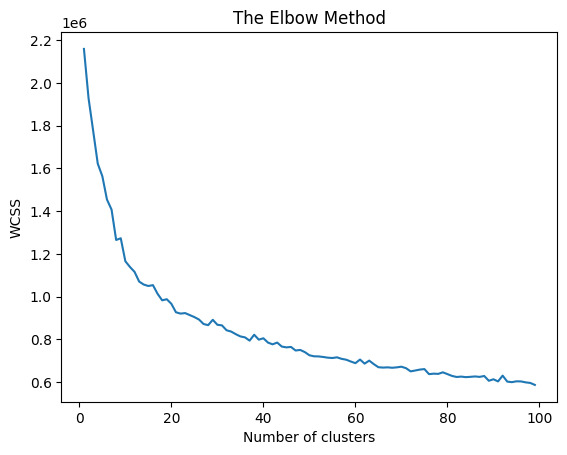

In [ ]:
# Plota o gráfico do Método do Cotovelo
plt.plot(range(1, 100), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Número de clusters desejado
K = 10

# Executa o algoritmo K-means
centroids, cluster_assignments, final_loss = k_means(X, K)

print("Centroides finais:\n", centroids)
print("Atribuições de clusters:", cluster_assignments)
print("Distorção final:", final_loss)

Centroides finais:
 [[0.00000000e+00 1.12107623e-01 3.95964126e+00 1.18744395e+01
  1.24215247e+01 5.39013453e+00 4.34977578e-01 0.00000000e+00
  8.96860987e-03 8.38565022e-01 8.20627803e+00 1.36008969e+01
  1.26771300e+01 9.87892377e+00 1.56502242e+00 0.00000000e+00
  0.00000000e+00 1.19282511e+00 8.30044843e+00 1.19103139e+01
  1.22466368e+01 9.43497758e+00 1.04035874e+00 0.00000000e+00
  0.00000000e+00 9.46188341e-01 7.17040359e+00 1.40852018e+01
  1.41479821e+01 4.98654709e+00 2.10762332e-01 0.00000000e+00
  0.00000000e+00 7.71300448e-01 8.04484305e+00 1.48251121e+01
  1.29372197e+01 2.23318386e+00 1.79372197e-02 0.00000000e+00
  0.00000000e+00 1.24663677e+00 1.06053812e+01 1.19461883e+01
  1.21569507e+01 4.17040359e+00 2.15246637e-01 0.00000000e+00
  1.34529148e-02 8.83408072e-01 9.68609865e+00 1.14529148e+01
  1.21255605e+01 5.74439462e+00 6.68161435e-01 4.48430493e-03
  4.48430493e-03 1.12107623e-01 4.17040359e+00 1.20269058e+01
  1.27847534e+01 4.95515695e+00 8.16143498e-01 8.9

In [ ]:
# Validação:
target = df_original['target'].values
validacao = target == cluster_assignments
pd.DataFrame(validacao).value_counts()

,count
0,
False,1781
True,16
